#<font color=purple>**Anotação do genoma da bactéria *Clostridium botulinum* com *pyrodigal* e *prokka***
##<font color=purple> Projeto Final WBDS LA CAMP
Elaborado para WBDSLA, por **Rafaella Pontes Marques**




<p xmlns:dct="http://purl.org/dc/terms/" xmlns:vcard="http://www.w3.org/2001/vcard-rdf/3.0#">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <a rel="dct:publisher"
     href="https://github.com/rpmarq">
    <span property="dct:title">Rafaella Pontes Marques</span></a>
  has waived all copyright and related or neighboring rights to
  <span property="dct:title">Projeto Final WBDS LA CAMP - Anotação do genoma da bactéria Clostridium botulinum com pyrodigal e prokka </span>.
This work is published from:
<span property="vcard:Country" datatype="dct:ISO3166"
      content="BR" about="https://github.com/rpmarq">
  Brasil</span>.
</p>

O **objetivo** deste projeto é realizar a anotação do genoma da bactéria *Clostridium botulinum* utilizando *pyrodigal* e *Prokka*. Adicionalmente, pretende-se realizar uma busca nominal simples com intuito de encontrar genes que codifiquem para algum dos subtipos da toxina botulínica.

Para mais informações a respeito do tema, sugiro consultar a seguinte bibliografia: [Botulism](https://www.ncbi.nlm.nih.gov/books/NBK459273/)

# **Passo 0: Preparar o ambiente para a execução das análises**

> Para o uso do *Entrez*, um metabuscador do NCBI, primeiro devemos preencher um arquivo (*credentials.py*) com o e-mail e a chave API fornecida pelo NCBI para usuários registrados ([Informações sobre chave API](https://support.nlm.nih.gov/knowledgebase/article/KA-05317/en-us))

## As seguintes bibliotecas, algoritmos e banco de dados serão necessários para as análise:

- ### **credentials.py**: armazenar chaves de acesso para a API NCBI;
- ### [**pandas**](https://pandas.pydata.org/): para manipulação de dataframes;
- ### [**pyrodigal**](https://pyrodigal.readthedocs.io/en/stable/): para a predição de genes codificadores;
- ### [**requests**](https://requests.readthedocs.io/en/latest/): para interagir com a API NCBI;
- ### [**BioPython**](https://biopython.org/) para manipulação de sequência;
- ### [**Galaxy**](https://usegalaxy.org/): uma plataforma online para análise de sequências biológicas que integra diversos algoritmos, dentre eles o **Prokka** e o **JBrowse**:
    - #### O [Prokka](https://academic.oup.com/bioinformatics/article/30/14/2068/2390517) é um algoritmo de anotação de genomas procariótos;
    - #### O [JBrowse](https://jbrowse.org/jb2/) é um genome browser (visualizador de genoma) online.
- ### [**UniProt**](https://www.uniprot.org/help/about) é um banco de dados de anotação de proteínas.

### 0.1 Instalação e Importação das bibliotecas mencionadas:

In [ ]:
!pip3 install pandas
!pip3 install pyrodigal
!pip3 install requests
!pip3 install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import credentials
import numpy  as np
import pandas as pd
import pyrodigal
import requests
import sys
from Bio import SeqIO
from Bio import Entrez

# **Passo 1: Obtendo uma sequência genômica**

 Podemos buscar o genoma de interesse no site do [NCBI - Genome](https://www.ncbi.nlm.nih.gov/data-hub/genome). Neste projeto, usaremos o genoma da bactéria *Clostridium botulinum*, causadora da **Botulismo**, que possui um mecanismo de patogenicidade mediada por toxinas.

- Para este projeto utilizaremos o assembly [ASM82793v1](https://www.ncbi.nlm.nih.gov/data-hub/genome/GCF_000827935.1/), e buscaremos as regiões codificadoras no genoma ([CP010520.1](https://www.ncbi.nlm.nih.gov/nuccore/CP010520.1/)).

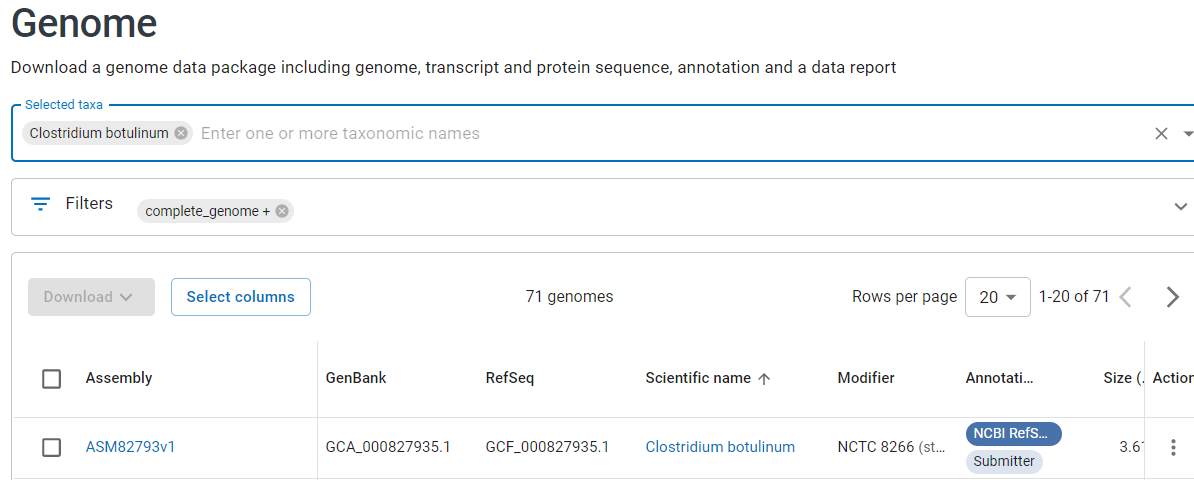

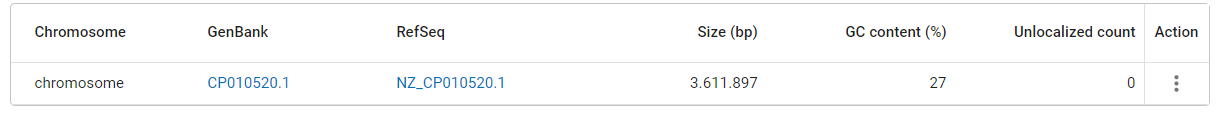

##1.1 Com as seguintes linhas de código podemos baixar a sequência genômica de interesse no formato genbank.

Nosso genoma é armazenado como um objeto do tipo `sequence` de modo que o arquivo não existe fisicamente em nosso disco rígido, a menos que o salvemos

In [ ]:
accession= "CP010520.1"
genoma= Entrez.efetch(db="nucleotide",
                       id=accession,
                       format="gb",
                       rettype="text")
record = SeqIO.read(genoma, "genbank")
genoma_length= len(record.seq)

In [ ]:
genoma_length

3611897

**O genoma possui então cerca de 3.611.897 pares de bases.**

# **Passo 2: Predição de genes usando prodigal (pyrodigal)**



Usaremos prodigal, pois podemos integrar rapidamente o prodigal aos notebooks python.

## 2.1 Com o código a seguir, podemos encontrar os genes codificadores de proteínas em nosso cromossomo procariótico

In [ ]:
orf_finder = pyrodigal.OrfFinder()
orf_finder.train(bytes(record.seq))
orf_genes  = orf_finder.find_genes(bytes(record.seq))

Os resultados do pyrodigal são armazenados no `genes`, e deste objeto podemos obter diferentes propriedades, como a tradução para sequências de aminoácidos e as posições das regiões codificantes.

## 2.2 Com o código a seguir, podemos armazenar as sequências de aminoácidos dos genes previstos em um novo arquivo `CP010520.1.faa`

> ### É importante especificarmos um prefixo para identificar nossas sequências de aminoácidos. Neste caso, estamos usando o genoma de *Clostridium botulinum*. Um prefixo adequado pode ser Cbotulinum.

In [ ]:
aa_file = accession + ".faa"
prefix  = "Cbotulinum"
with open(aa_file, "w") as orf_gene:
    orf_genes.write_translations(orf_gene,sequence_id=prefix)

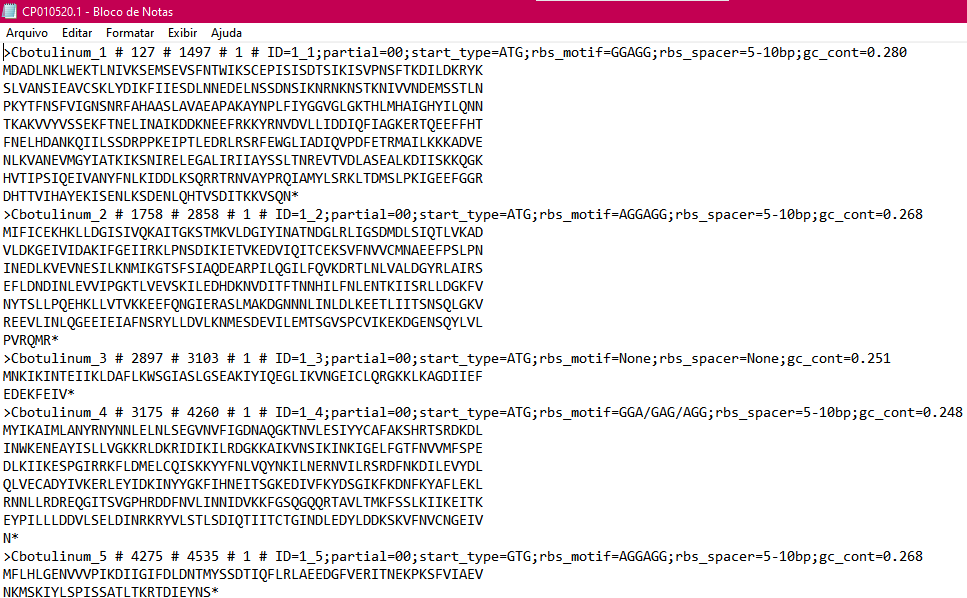

## 2.3 Com o código a seguir, podemos armazenar as coordenadas dos genes previstos em um novo arquivo `CP010520.1.gff`

In [ ]:
gff_file = accession + ".gff"
prefix  = "Cbotulinum"
with open(gff_file, "w") as orf_gene:
    orf_genes.write_gff(orf_gene,sequence_id=prefix)

O arquivo `CP010520.1.gff` será útil para visualizar as previsões feitas

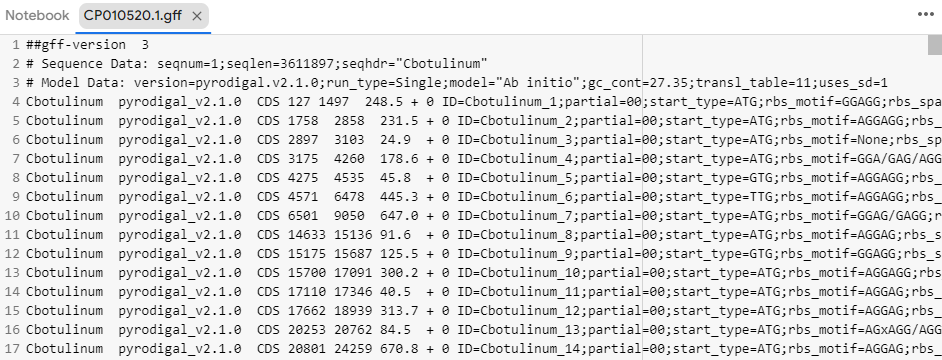

### 2.3.1 Transformando o arquivo gff em um dataframe

In [ ]:
gff_columns     = ["chr","source","feature_type","start","end","score","strand","phase","info"]
gff_df          = pd.read_csv(gff_file,sep="\t",comment="#",header=None,names=gff_columns)
gff_df["start"] = gff_df["start"].astype(int)
gff_df["end"]   = gff_df["end"].astype(int)

### 2.3.2 Obtendo informações adicionais do dataframe `gff_df`

In [ ]:
def get_gff_info(info_str):
    out_dict = {}
    info_arr = info_str.split(";")
    for line in info_arr:
        if "=" in line:
            line_arr    = line.split("=")
            field_name  = line_arr[0]
            field_value = line_arr[1]
            out_dict[field_name] = field_value
    return out_dict

In [ ]:
gff_df["annotation"] = gff_df["info"].apply(lambda x: get_gff_info(x))

In [ ]:
gff_df

,chr,source,feature_type,start,end,score,strand,phase,info,annotation
0,Cbotulinum,pyrodigal_v2.1.0,CDS,127,1497,248.5,+,0,ID=Cbotulinum_1;partial=00;start_type=ATG;rbs_...,"{'ID': 'Cbotulinum_1', 'partial': '00', 'start..."
1,Cbotulinum,pyrodigal_v2.1.0,CDS,1758,2858,231.5,+,0,ID=Cbotulinum_2;partial=00;start_type=ATG;rbs_...,"{'ID': 'Cbotulinum_2', 'partial': '00', 'start..."
2,Cbotulinum,pyrodigal_v2.1.0,CDS,2897,3103,24.9,+,0,ID=Cbotulinum_3;partial=00;start_type=ATG;rbs_...,"{'ID': 'Cbotulinum_3', 'partial': '00', 'start..."
3,Cbotulinum,pyrodigal_v2.1.0,CDS,3175,4260,178.6,+,0,ID=Cbotulinum_4;partial=00;start_type=ATG;rbs_...,"{'ID': 'Cbotulinum_4', 'partial': '00', 'start..."
4,Cbotulinum,pyrodigal_v2.1.0,CDS,4275,4535,45.8,+,0,ID=Cbotulinum_5;partial=00;start_type=GTG;rbs_...,"{'ID': 'Cbotulinum_5', 'partial': '00', 'start..."
...,...,...,...,...,...,...,...,...,...,...
3167,Cbotulinum,pyrodigal_v2.1.0,CDS,3609254,3609880,106.7,-,0,ID=Cbotulinum_3168;partial=00;start_type=ATG;r...,"{'ID': 'Cbotulinum_3168', 'partial': '00', 'st..."
3168,Cbotulinum,pyrodigal_v2.1.0,CDS,3609928,3610707,139.4,-,0,ID=Cbotulinum_3169;partial=00;start_type=ATG;r...,"{'ID': 'Cbotulinum_3169', 'partial': '00', 'st..."
3169,Cbotulinum,pyrodigal_v2.1.0,CDS,3610733,3610945,7.1,-,0,ID=Cbotulinum_3170;partial=00;start_type=ATG;r...,"{'ID': 'Cbotulinum_3170', 'partial': '00', 'st..."
3170,Cbotulinum,pyrodigal_v2.1.0,CDS,3610914,3611291,55.7,-,0,ID=Cbotulinum_3171;partial=00;start_type=ATG;r...,"{'ID': 'Cbotulinum_3171', 'partial': '00', 'st..."


A partir deste dataframe podemos identificar as coordenadas das ORFs, a fita e a fase de leitura das sequências preditas pelo pyrodigal.

# **Passo 3: Anotar o genoma utilizando o algoritmo Prokka no Galaxy**

Uma outra maneira de visualizar as regiões codificadoras e as possíveis proteínas preditas é através do Prokka no Galaxy. O Prokka utiliza diversas ferramentas para anotação, incluindo o Prodigal.

## 3.1 Baixar o genoma de referência a ser utilizado

[ASM82793v1](https://www.ncbi.nlm.nih.gov/data-hub/genome/GCF_000827935.1/)

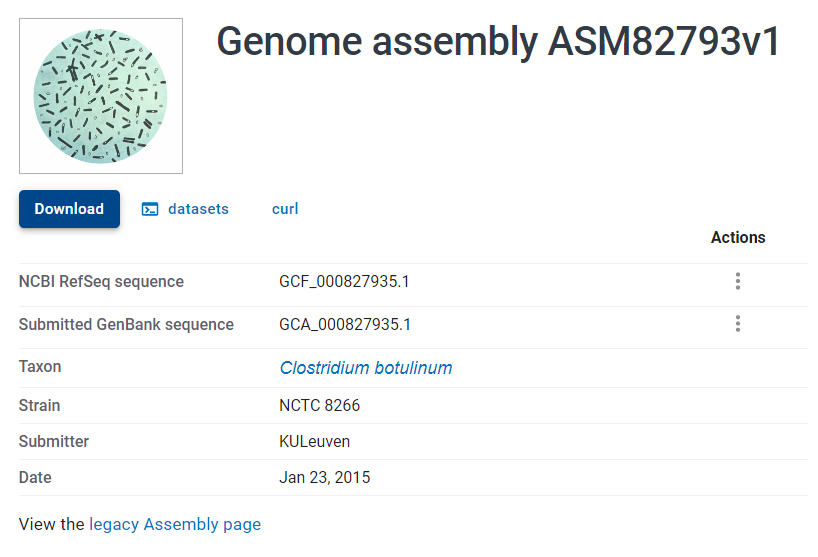

## 3.2 Fazer upload do arquivo na plataforma [Galaxy](https://usegalaxy.org/)

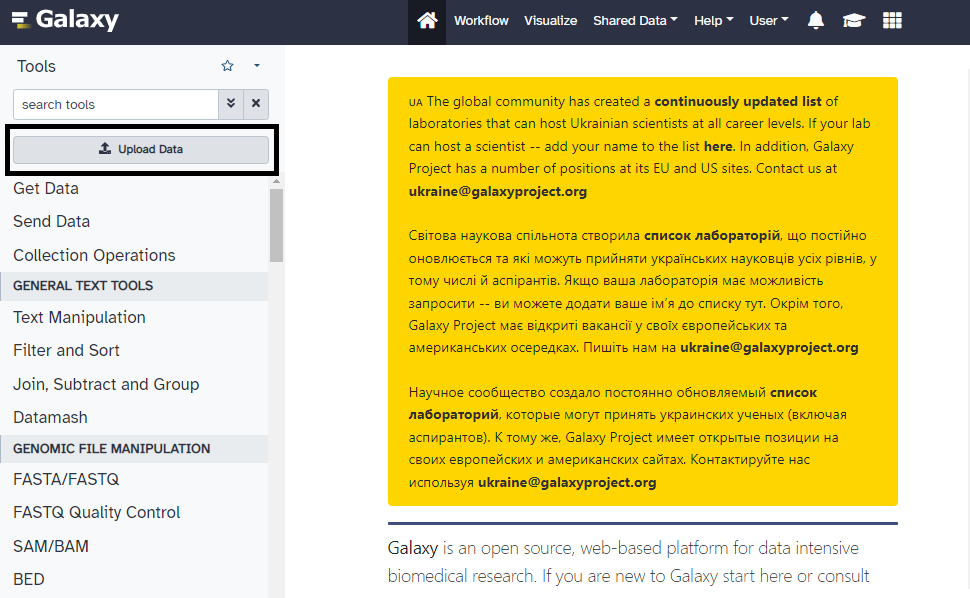

## 3.3 Utilizar o algoritmo `Prokka` para a anotação do genoma procarióto

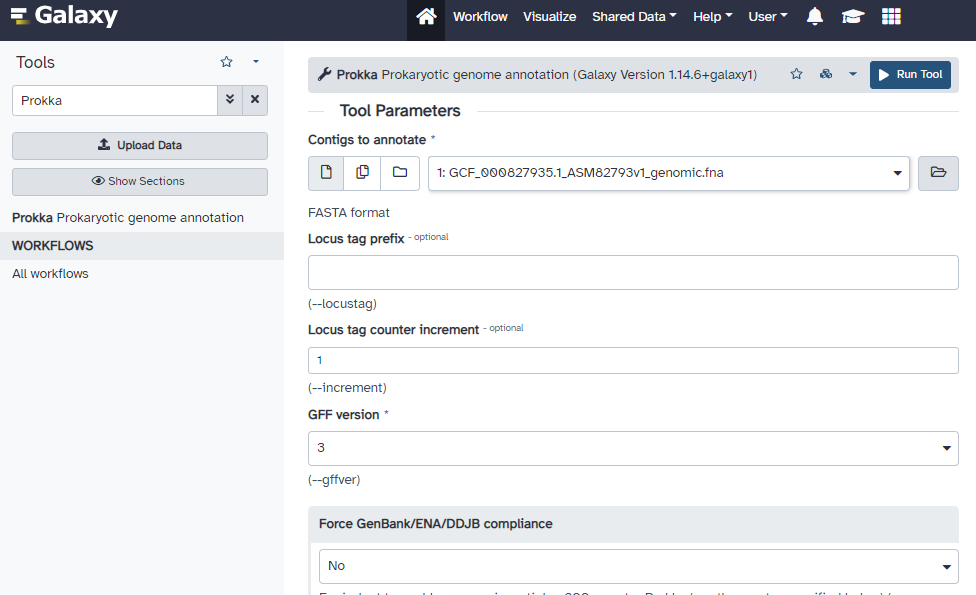

###(Utilizar os parâmetros default)

### A partir dessa análise serão gerados os seguintes arquivos:
- **Prokka on data 1: log**: arquivo contendo os parâmetros e comandos usados na análise;
- **Prokka on data 1: txt**: arquivo contendo um resumo dos resultados;
- **Prokka on data 1: err**: arquivo contendo os erros fatais;
- **Prokka on data 1: tsv** e **Prokka on data 1: tbl**: arquivos semelhantes em formato tabular que apresentam o locus genômico, tamanho da sequência, gene e produto gerado;
- **Prokka on data 1: fsa**: arquivo contendo a sequência dos contigs
- **Prokka on data 1: sqn**: arquivo contendo as informações da análise e que pode ser submetido ao GenBank;
- **Prokka on data 1: ffn**: arquivo contendo as sequências de cDNA das proteínas identificadas;
- **Prokka on data 1: faa**: arquivo contendo as sequências de aminoácidos das proteínas identificadas;
- **Prokka on data 1: fna**: arquivo contendo a sequência input;
- **Prokka on data 1: gbk**: arquivo GenBank contendo as sequências e anotações;
- **Prokka on data 1: gff**: arquivo gff contendo as sequências e anotações.

##3.4 Podemos baixar o arquivo tabular contendo as anotações com a biblioteca `pandas`

In [ ]:
prokka = pd.read_csv("https://usegalaxy.org/api/datasets/f9cad7b01a4721359cd81695bee84930/display?to_ext=tabular", sep="\t")
prokka

,locus_tag,ftype,length_bp,gene,EC_number,COG,product
0,DDKPLPJN_00001,CDS,1371,dnaA_1,NaN,COG0593,Chromosomal replication initiator protein DnaA
1,DDKPLPJN_00002,CDS,1101,dnaN,NaN,COG0592,Beta sliding clamp
2,DDKPLPJN_00003,CDS,207,NaN,NaN,NaN,hypothetical protein
3,DDKPLPJN_00004,CDS,1086,recF_1,NaN,COG1195,DNA replication and repair protein RecF
4,DDKPLPJN_00005,CDS,261,NaN,NaN,NaN,hypothetical protein
...,...,...,...,...,...,...,...
3283,DDKPLPJN_03282,CDS,627,NaN,NaN,NaN,hypothetical protein
3284,DDKPLPJN_03283,CDS,780,yidC,NaN,NaN,Membrane protein insertase YidC
3285,DDKPLPJN_03284,CDS,213,yidD,NaN,COG0759,Putative membrane protein insertion efficiency...
3286,DDKPLPJN_03285,CDS,378,rnpA,3.1.26.5,COG0594,Ribonuclease P protein component


### 3.4.1 Visto que os genes codificadores da neurotoxina botulínica são identificados como bot(A-H) podemos utilizar `str.contains` para buscar de maneira nominal se há algum gene relacionado

In [ ]:
toxinas = prokka[prokka['gene'].str.contains('bot', na=False)]
toxinas

,locus_tag,ftype,length_bp,gene,EC_number,COG,product
1083,DDKPLPJN_01084,CDS,3759,botE,NaN,NaN,Botulinum neurotoxin type E


### 3.4.2 Na plataforma Galaxy, selecionando o arquivo `Prokka on data 1: faa` encontrar as sequência proteica de botE utilizando **DDKPLPJN_01084** na busca após *Ctrl + F*

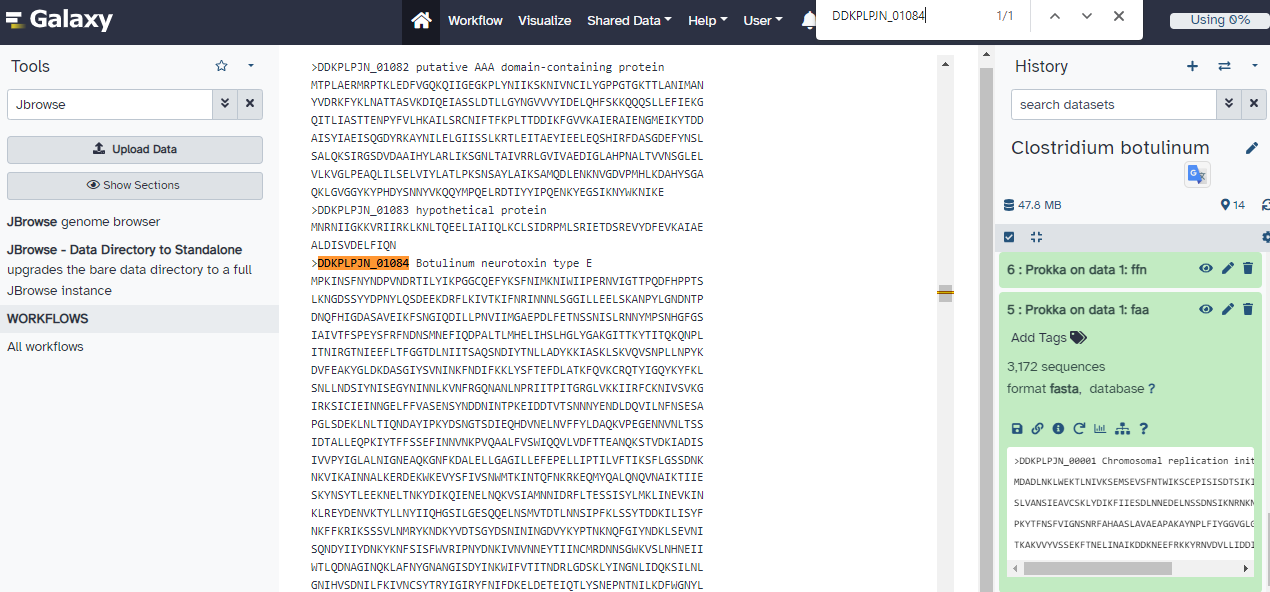

In [ ]:
botE_aa = "MPKINSFNYNDPVNDRTILYIKPGGCQEFYKSFNIMKNIWIIPERNVIGTTPQDFHPPTSLKNGDSSYYDPNYLQSDEEKDRFLKIVTKIFNRINNNLSGGILLEELSKANPYLGNDNTPDNQFHIGDASAVEIKFSNGIQDILLPNVIIMGAEPDLFETNSSNISLRNNYMPSNHGFGSIAIVTFSPEYSFRFNDNSMNEFIQDPALTLMHELIHSLHGLYGAKGITTKYTITQKQNPLITNIRGTNIEEFLTFGGTDLNIITSAQSNDIYTNLLADYKKIASKLSKVQVSNPLLNPYKDVFEAKYGLDKDASGIYSVNINKFNDIFKKLYSFTEFDLATKFQVKCRQTYIGQYKYFKLSNLLNDSIYNISEGYNINNLKVNFRGQNANLNPRIITPITGRGLVKKIIRFCKNIVSVKGIRKSICIEINNGELFFVASENSYNDDNINTPKEIDDTVTSNNNYENDLDQVILNFNSESAPGLSDEKLNLTIQNDAYIPKYDSNGTSDIEQHDVNELNVFFYLDAQKVPEGENNVNLTSSIDTALLEQPKIYTFFSSEFINNVNKPVQAALFVSWIQQVLVDFTTEANQKSTVDKIADISIVVPYIGLALNIGNEAQKGNFKDALELLGAGILLEFEPELLIPTILVFTIKSFLGSSDNKNKVIKAINNALKERDEKWKEVYSFIVSNWMTKINTQFNKRKEQMYQALQNQVNAIKTIIESKYNSYTLEEKNELTNKYDIKQIENELNQKVSIAMNNIDRFLTESSISYLMKLINEVKINKLREYDENVKTYLLNYIIQHGSILGESQQELNSMVTDTLNNSIPFKLSSYTDDKILISYFNKFFKRIKSSSVLNMRYKNDKYVDTSGYDSNININGDVYKYPTNKNQFGIYNDKLSEVNISQNDYIIYDNKYKNFSISFWVRIPNYDNKIVNVNNEYTIINCMRDNNSGWKVSLNHNEIIWTLQDNAGINQKLAFNYGNANGISDYINKWIFVTITNDRLGDSKLYINGNLIDQKSILNLGNIHVSDNILFKIVNCSYTRYIGIRYFNIFDKELDETEIQTLYSNEPNTNILKDFWGNYLLYDKEYYLLNVLKPNNFIDRRKDSTLSINNIRSTILLANRLYSGIKVKIQRVNNSSTNDNLVRKNDQVYINFVASKTHLFPLYADTATTNKEKTIKISSSGNRFNQVVVMNSVGNNCTMNFKNNNGNNIGLLGFKADTVVASTWYYTHMRDHTNSNGCFWNFISEEHGWQEK"

### 3.4.3 Na plataforma Galaxy, selecionando o arquivo `Prokka on data 1: tbl` encontrar as coordenadas genômicas utilizando **DDKPLPJN_01084** na busca após *Ctrl + F*

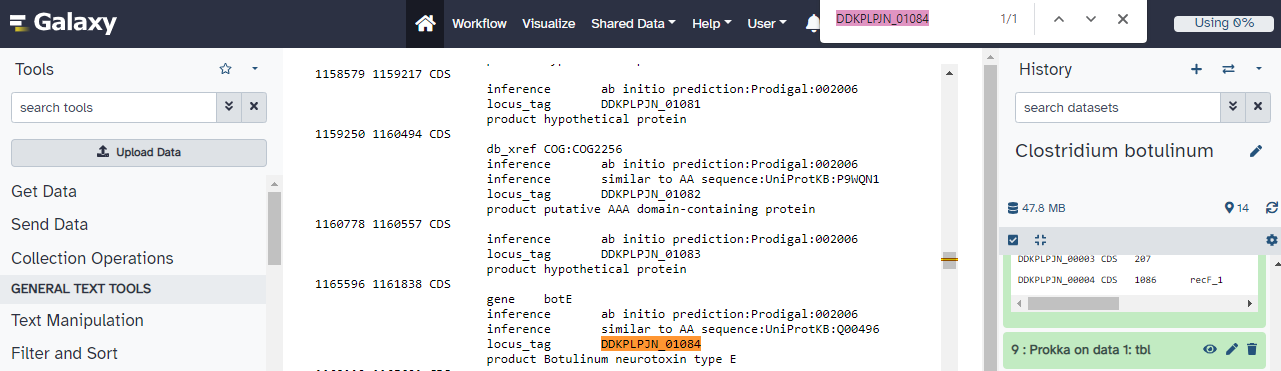

O gene está localizado nas coordenadas **1165596-1161838**

# **Passo 4: Visualizar a região genômica utilizando o algoritmo `Jbrowse` no Galaxy**

## 4.1 Utilizar a sequência input `Prokka on data 1: fna` como genoma de referência

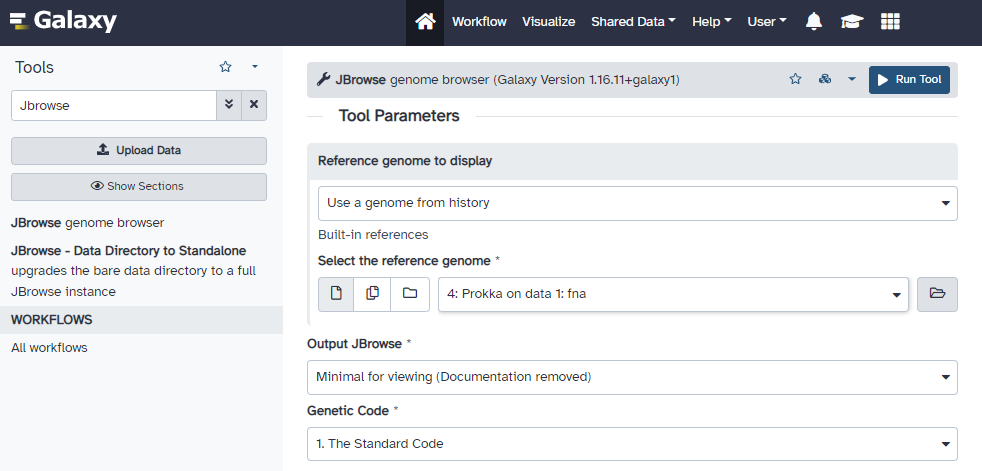


## 4.2 O arquivo `Prokka on data 1: gff` deve ser utilizado como parâmetro no *Track Group*

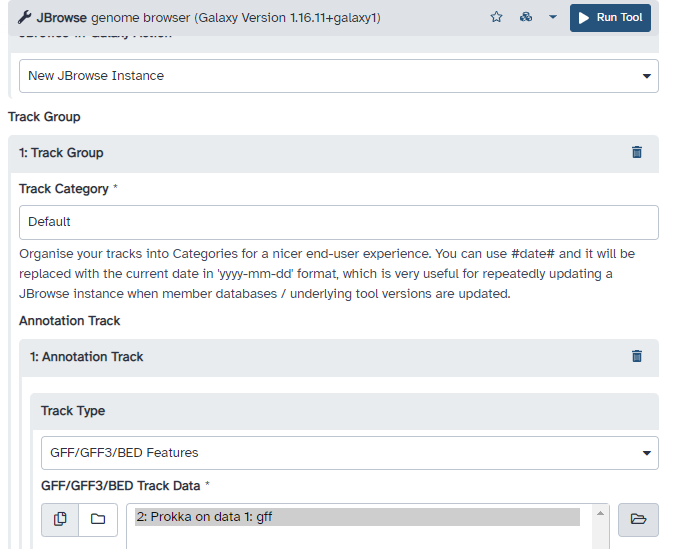

### A análise gera como resultado o arquivo `JBrowse on data 2 and data 4 - minimal`, um [visualizador do genoma](https://usegalaxy.org/datasets/f9cad7b01a472135f1ad8b380459ee03/display/?preview=True&loc=NZ_CP010520.1%3A1161838..1165596&tracks=DNA%2C39478e4cd0509717a1b5d6108b47bfca_0&highlight=)

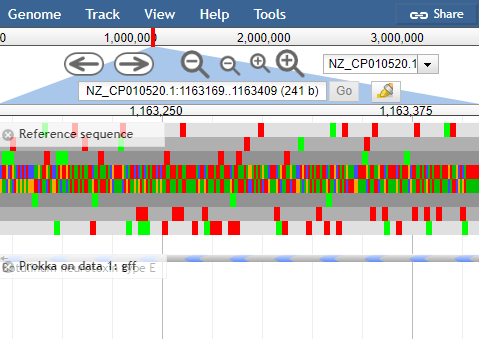

## 4.3 Inserindo a posição genômica no buscador, podemos verificar mais informações sobre o gene da **Toxina Botulínica subtipo E**

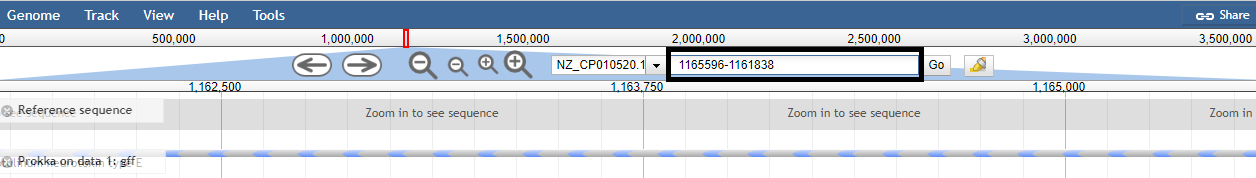

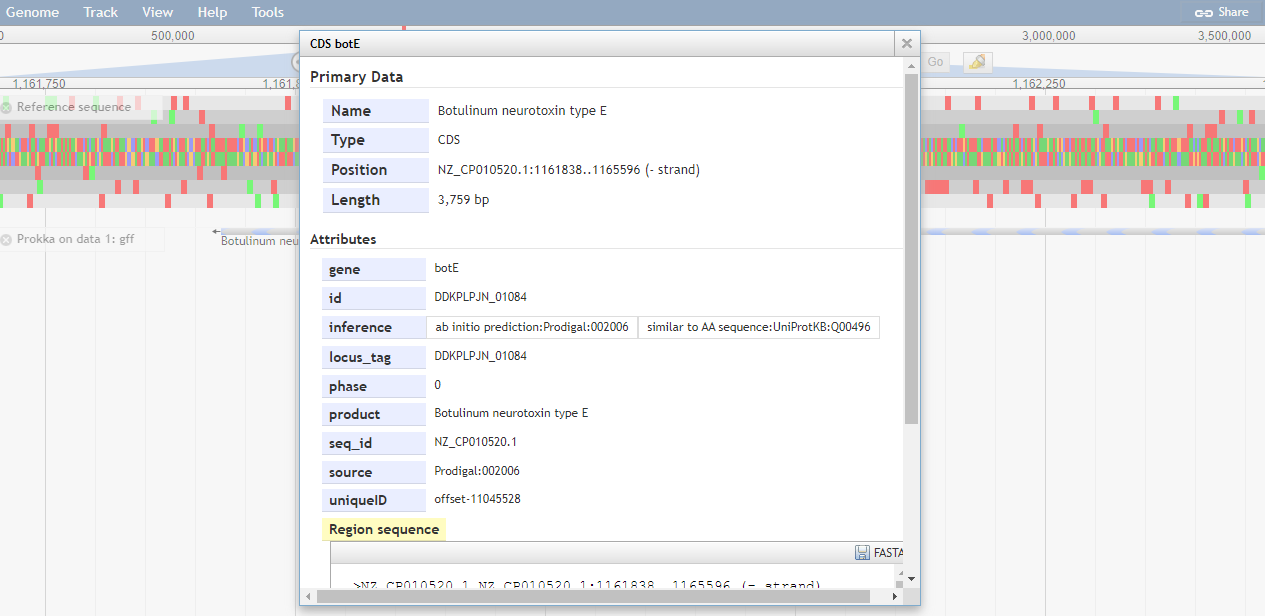

### Dessa maneira podemos identificar algumas informações sobre o gene da **Toxina Botulínica subtipo E**:
- **Position**: NZ_CP010520.1:1161838..1165596 (- strand)
- **Length**: 3,759 bp
- **similar to AA sequence**: UniProtKB:Q00496
- **sequência de cDNA**

In [ ]:
botE_nt = "ATGCCAAAAATTAATAGTTTTAATTATAATGATCCTGTTAATGATAGAACAATTTTATATATTAAACCAGGCGGTTGTCAAGAATTTTATAAATCATTTAATATTATGAAAAATATTTGGATAATTCCAGAGAGAAATGTAATTGGTACAACCCCCCAAGATTTTCATCCGCCTACTTCATTAAAAAATGGAGATAGTAGTTATTATGACCCTAATTATTTACAAAGTGATGAAGAAAAGGATAGATTTTTAAAAATAGTCACAAAAATATTTAATAGAATAAATAATAATCTTTCAGGAGGGATTTTATTAGAAGAACTGTCAAAAGCTAATCCATATTTAGGGAATGATAATACTCCAGATAATCAATTCCATATTGGTGATGCATCAGCAGTTGAGATTAAATTCTCAAATGGTATCCAAGACATACTATTACCTAATGTTATTATAATGGGAGCAGAGCCTGATTTATTTGAAACTAACAGTTCCAATATTTCTCTAAGAAATAATTATATGCCAAGCAATCACGGTTTTGGATCAATAGCTATAGTAACATTCTCACCTGAATATTCTTTTAGATTTAATGATAATAGTATGAATGAATTTATTCAAGATCCTGCTCTTACATTAATGCATGAATTAATACATTCATTACATGGACTATATGGGGCTAAAGGGATTACTACAAAGTATACTATAACACAAAAACAAAATCCCCTAATAACAAATATAAGAGGTACAAATATTGAAGAATTCTTAACTTTTGGAGGTACTGATTTAAACATTATTACTAGTGCTCAGTCCAATGATATCTATACTAATCTTCTAGCTGATTATAAAAAAATAGCGTCTAAACTTAGCAAAGTACAAGTATCTAATCCACTACTTAATCCTTATAAAGATGTTTTTGAAGCAAAGTATGGATTAGATAAAGATGCTAGCGGAATTTATTCGGTAAATATAAACAAATTTAATGATATTTTTAAAAAATTATACAGCTTTACGGAATTTGATTTAGCAACTAAATTTCAAGTTAAATGTAGGCAAACTTATATTGGACAGTATAAATACTTCAAACTTTCAAACTTGTTAAATGATTCTATTTATAATATATCAGAAGGCTATAATATAAATAATTTAAAGGTAAATTTTAGAGGACAGAATGCAAATTTAAATCCTAGAATTATTACACCAATTACAGGTAGAGGACTAGTAAAAAAAATCATTAGATTTTGTAAAAATATTGTTTCTGTAAAAGGCATAAGGAAATCAATATGTATCGAAATAAATAATGGTGAGTTATTTTTTGTGGCTTCCGAGAATAGTTATAATGATGATAATATAAATACTCCTAAAGAAATTGACGATACAGTAACTTCAAATAATAATTATGAAAATGATTTAGATCAGGTTATTTTAAATTTTAATAGTGAATCAGCACCTGGACTTTCAGATGAAAAATTAAATTTAACTATCCAAAATGATGCTTATATACCAAAATATGATTCTAATGGAACAAGTGATATAGAACAACATGATGTTAATGAACTTAATGTATTTTTCTATTTAGATGCACAGAAAGTGCCCGAAGGTGAAAATAATGTCAATCTCACCTCTTCAATTGATACAGCATTATTAGAACAACCTAAAATATATACATTTTTTTCATCAGAATTTATTAATAATGTCAATAAACCTGTGCAAGCAGCATTATTTGTAAGCTGGATACAACAAGTGTTAGTAGATTTTACTACTGAAGCTAACCAAAAAAGTACTGTTGATAAAATTGCAGATATTTCTATAGTTGTTCCATATATAGGTCTTGCTTTAAATATAGGAAATGAAGCACAAAAAGGAAATTTTAAAGATGCACTTGAATTATTAGGAGCAGGTATTTTATTAGAATTTGAACCCGAGCTTTTAATTCCTACAATTTTAGTATTCACGATAAAATCTTTTTTAGGTTCATCTGATAATAAAAATAAAGTTATTAAAGCAATAAATAATGCATTGAAAGAAAGAGATGAAAAATGGAAAGAAGTATATAGTTTTATAGTATCGAATTGGATGACTAAAATTAATACACAATTTAATAAAAGAAAAGAACAAATGTATCAAGCTTTACAAAATCAAGTAAATGCAATTAAAACAATAATAGAATCTAAGTATAATAGTTATACTTTAGAGGAAAAAAATGAGCTTACAAATAAATATGATATTAAGCAAATAGAAAATGAACTTAATCAAAAGGTTTCTATAGCAATGAATAATATAGACAGGTTCTTAACTGAAAGTTCTATATCCTATTTAATGAAATTAATAAATGAAGTAAAAATTAATAAATTAAGAGAATATGATGAGAATGTCAAAACGTATTTATTGAATTATATTATACAACATGGATCAATCTTGGGAGAGAGTCAGCAAGAACTAAATTCTATGGTAACTGATACCCTAAATAATAGTATTCCTTTTAAGCTTTCTTCTTATACAGATGATAAAATTTTAATTTCATATTTTAATAAATTCTTTAAGAGAATTAAAAGTAGTTCAGTTTTAAATATGAGATATAAAAATGATAAATACGTAGATACTTCAGGATATGATTCAAATATAAATATTAATGGAGATGTATATAAATATCCAACTAATAAAAATCAATTTGGAATATATAATGATAAACTTAGTGAAGTTAATATATCTCAAAATGATTACATTATATATGATAATAAATATAAAAATTTTAGTATTAGTTTTTGGGTAAGAATTCCTAACTATGATAATAAGATAGTAAATGTTAATAATGAATACACTATAATAAATTGTATGAGAGATAATAATTCAGGATGGAAAGTATCTCTTAATCATAATGAAATAATTTGGACATTGCAAGATAATGCAGGAATTAATCAAAAATTAGCATTTAACTATGGTAACGCAAATGGTATTTCTGATTATATAAATAAGTGGATTTTTGTAACTATAACTAATGATAGATTAGGAGATTCTAAACTTTATATTAATGGAAATTTAATAGATCAAAAATCAATTTTAAATTTAGGTAATATTCATGTTAGTGACAATATATTATTTAAAATAGTTAATTGTAGTTATACAAGATATATTGGTATTAGATATTTTAATATTTTTGATAAAGAATTAGATGAAACAGAAATTCAAACTTTATATAGCAATGAACCTAATACAAATATTTTGAAGGATTTTTGGGGAAATTATTTGCTTTATGACAAAGAATACTATTTATTAAATGTGTTAAAACCAAATAACTTTATTGATAGGAGAAAAGATTCTACTTTAAGCATTAATAATATAAGAAGCACTATTCTTTTAGCTAATAGATTATATAGTGGAATAAAAGTTAAAATACAAAGAGTTAATAATAGTAGTACTAACGATAATCTTGTTAGAAAGAATGATCAGGTATATATTAATTTTGTAGCCAGCAAAACTCACTTATTTCCATTATATGCTGATACAGCTACCACAAATAAAGAGAAAACAATAAAAATATCATCATCTGGCAATAGATTTAATCAAGTAGTAGTTATGAATTCAGTAGGAAATAATTGTACAATGAATTTTAAAAATAATAATGGAAATAATATTGGGTTGTTAGGTTTCAAGGCAGATACTGTAGTTGCTAGTACTTGGTATTATACACATATGAGAGATCATACAAACAGCAATGGATGTTTTTGGAACTTTATTTCTGAAGAACATGGATGGCAAGAAAAATAA"

#**Passo 5: Buscar a sequência similar no banco de dados do `UniProt`**

Na página referente a sequência [UniProtKB:Q00496](https://www.uniprot.org/uniprotkb/Q00496/entry#function) encontramos diversas seções (Function; Names & Taxonomy; Subcellular Location; Phenotypes & Variants; PTM/Processing; Interaction; Structure; Family & Domains; Sequence; Similar Proteins).

Aqui vamos focar em duas dessas seções: **Structure** e **Family & Domains**

## 5.1 Visualizando a seção **Structure**

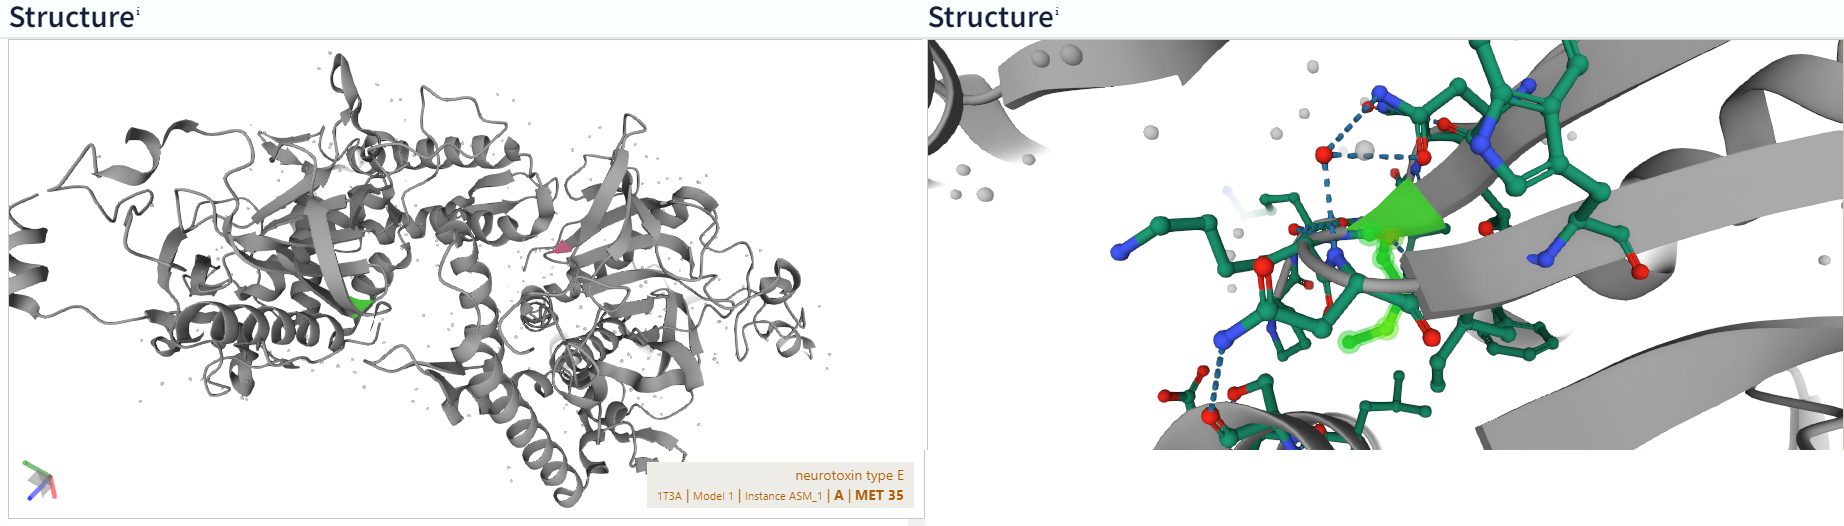

Nesta seção podemos observar a estrutura tridimensional da proteína de diversos projetos armazenados no banco de dados **PDB**

## 5.2 Visualizando a seção **Family & Domains** 

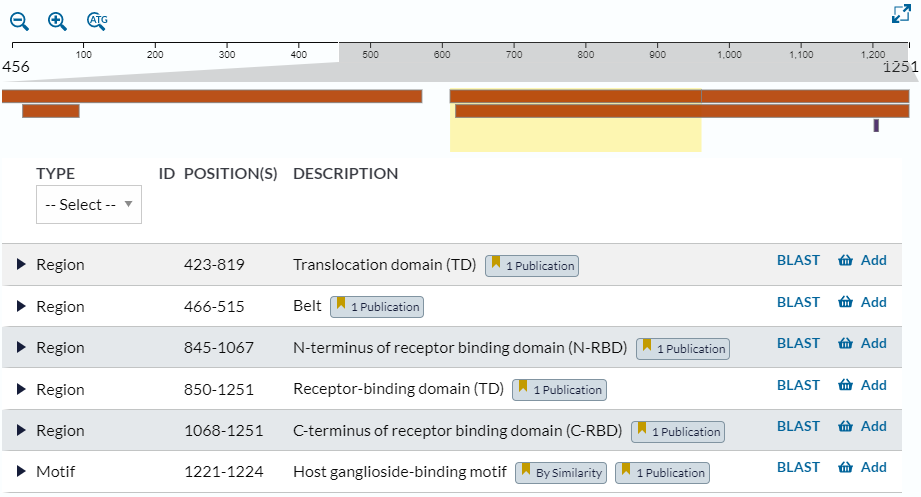

Nesta seção identificamos os domínios proteicos da proteína.
- **Botulinum neurotoxin E light chain**

  Atividade de Protease

- **Botulinum neurotoxin E heavy chain**

  Tem 3 domínios funcionais; domínio de translocação  (TD) e o domínio de ligação ao receptor (RBD) que é subdividido nos domínios N e C terminal (N-RBD and C-RBD).

# **Resumo do projeto**

Neste projeto utilizamos bibliotecas e algoritmos que nos permitiram:

- Baixar sequências genômicas não anotadas do GenBank
- Prever sequências de codificação de proteínas no genoma de referência
- Anotar um genoma procarióto
- Mapear as proteinas preditas a sequência genômica
- Visualizar a anotação de proteínas


# **Conclusões**

A partir dessas análises podemos concluir que diversas ferramentas bioinformáticas e banco de dados públicos podem ser utilizados para facilitar a anotação e predição de genes e proteínas, o que auxilia na obtenção de um panorama geral sobre um pergunta de pesquisa. Etapas adicionais como a busca de sequências homólogas podem ser ferramentas complementares para a execução do projeto.